### Homework 2
#### Jennifer Vo 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

##### Part 1

A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

The probability of rolling snake eyes (two ones) is 1/6 * 1/6 = 1/36 = 0.02778.
There are 36 possible dice combinations of 2 six-sided dice, and 6 ways to roll seven (6 + 1, 5 + 2, 4 + 3, 3 + 4, 2 + 5, 1 + 6). The probability of rolling sevens (dice sum to seven) is thus 6/36 = 1/6 = 0.1667

The ratio of the probabilities is (1/36) / (1/6) = 1/6 or 0.1667.

#### Part 2
Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

The convolution operator is $P_{A+B}(x) = \sum_{z}P_A(z)P_B(x-z)$

##### Analytically (math & counting):

$P(2) = P(1)*P(1) = 1/36$

$P(3) = P(2)*P(1) + P(1)*P(2) = 2/36$

$P(4) = P(3)*P(1) + P(2)*P(2) + P(1)*P(3) = 3/36$

$P(5) = P(4)*P(1) + P(3)*P(2) + P(2)*P(3) + P(1)*P(4) = 4/36$

$P(6) = P(5)*P(1) + P(4)*P(2) + P(3)*P(3) + P(2)*P(4) + P(1)*P(5) = 5/36$

$P(7) = P(6)*P(1) + P(5)*P(2) + P(4)*P(3) + P(3)*P(4) + P(2)*P(5) + P(1)*P(6) = 6/36 = 1/6$

$P(8) = P(6)*P(2) + P(5)*P(3) + P(4)*P(4) + P(3)*P(5) + P(2)*P(6) = 5/36$

$P(9) = P(6)*P(3) + P(5)*P(4) + P(4)*P(5) + P(3)*P(6) = 4/36$

$P(10) = P(6)*P(4) + P(5)*P(5) + P(4)*P(6) = 3/36$

$P(11) = P(6)*P(5) + P(5)*P(6) = 2/36$

$P(12) = P(6)*P(6) = 1/36$

##### Numerically: 

In [91]:
dice_1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
conv_dice = np.convolve(dice_1, dice_2)
print(conv_dice)

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


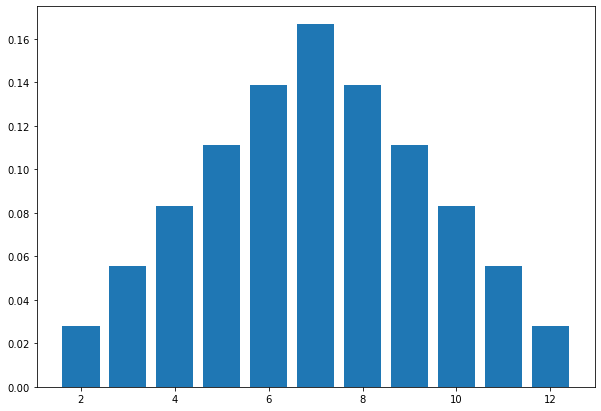

In [95]:
values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

plt.rcParams["figure.figsize"] = (10,7)
plt.bar(values, conv_dice)
plt.show()

#### Part 3

Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

In [96]:
avg_x = 0
for i in range (0, 11):
    avg_x += conv_dice[i]*values[i]
print(f'The average value for the sum of 2 six-sided dice is {avg_x:.2f}')

The average value for the sum of 2 six-sided dice is 7.00


In [97]:
values_squared = []
for i in range (0, 11):
    values_squared.append(values[i]*values[i])

avg_xsq = 0
for i in range (0, 11):
    avg_xsq += conv_dice[i]*values_squared[i]

var = avg_xsq - (avg_x*avg_x)
    
print(f'The variance of the sum of 2 six-sided dice is {var:.2f}')

The variance of the sum of 2 six-sided dice is 5.83


Explanation of why this makes sense?

#### Part 4

Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

In [98]:
standard_dice = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
conv_dice = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (0, 9):
    conv_dice = np.convolve(conv_dice, standard_dice)

#print(conv_dice)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


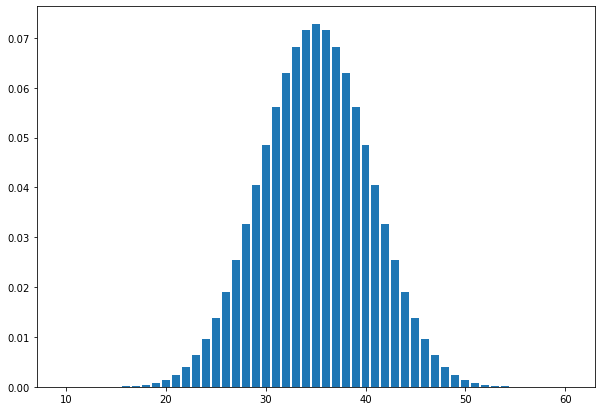

In [99]:
values_10dice = []
for i in range (10, 61):
    values_10dice.append(i)
print(values_10dice)

plt.bar(values_10dice, conv_dice)
plt.show()

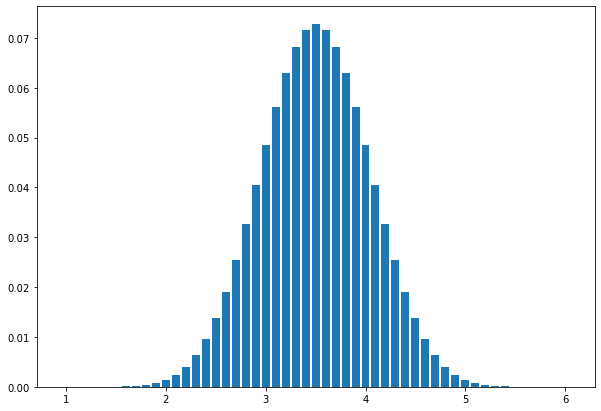

In [100]:
# x = []
# for i in range (0, 100000):
#     sum = 0
#     for j in range (0, 10):
#         sum += np.random.randint(0, 7)
#     x.append(sum/10)

# plt.hist(x, 150)
# plt.show()

x_values = []
for i in range (0, len(values_10dice)):
    x_values.append(values_10dice[i]/10)
    
plt.bar(x_values, conv_dice, width = 0.08)
plt.show()

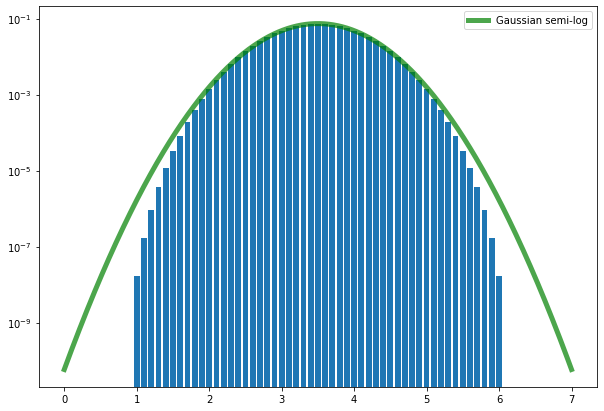

In [208]:
# Plot on semi-log graph
plt.bar(x_values, conv_dice, width = 0.08)

# Also plotting a Gaussian on semi-log 
x_gauss = np.linspace(0, 7, 1000)
y_gauss = 0.1*stats.norm.pdf(x_gauss, loc=3.5, scale = 1/1.85)
plt.plot(x_gauss, y_gauss, 'g', linewidth = 5, alpha = 0.7, label = 'Gaussian semi-log')
plt.legend()
plt.yscale('log')
plt.show()

The plot of the average of 10 dice rolls does look very close to a Gaussian, and by plotting it on a semi-log graph it confirms that the shape is approximately an upside-down parabola (characteristic of a Gaussian semi-log plot) only near the mean, but quickly does not match the upside-down parabola shape farther away from the mean. (explain more here)

#### Part 5

Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

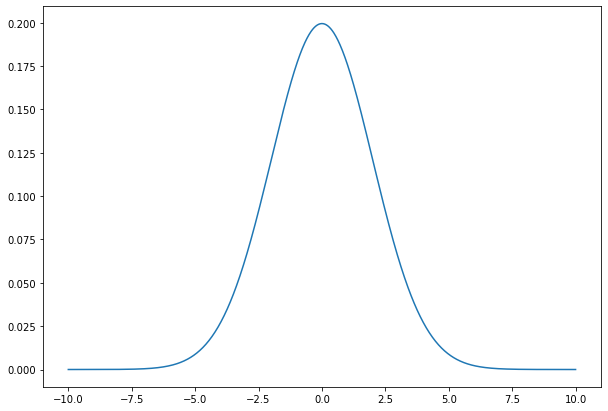

In [123]:
#x = stats.norm.rvs(loc = 0, scale = 1, size = 100000)
#std_x = np.std(x)
#print(f'The standard deviation is {std_x:.4f}.')
#From this we know that scale = 1 indeed defines the standard distribution = 1.

std_gauss = 1
x_gauss = np.linspace(-10,10,1000)
y_gauss = stats.norm.pdf(x, loc = 0, scale = std_gauss)

plt.plot(x,y)
plt.show()

In [124]:
#Sum of 2 gaussians = convolution
conv_gauss = np.convolve(y_gauss, y_gauss)

size = len(conv_gauss)
print(size)

1999


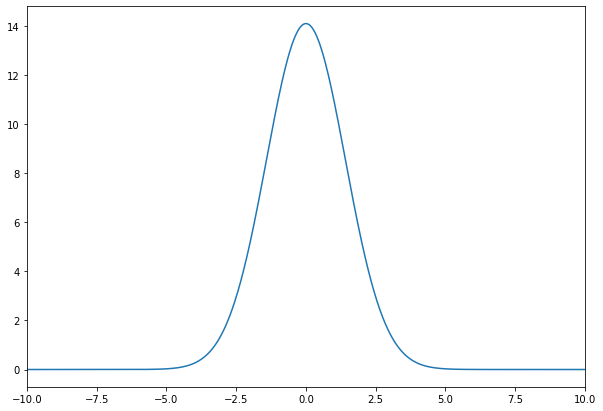

In [125]:
# Creating a new linear space for the convolution distribution, with the same number of values as the convolution result
x_conv = np.linspace(-20, 20, size)

plt.plot(x_conv, conv_gauss)
plt.xlim(-10,10)
plt.show()

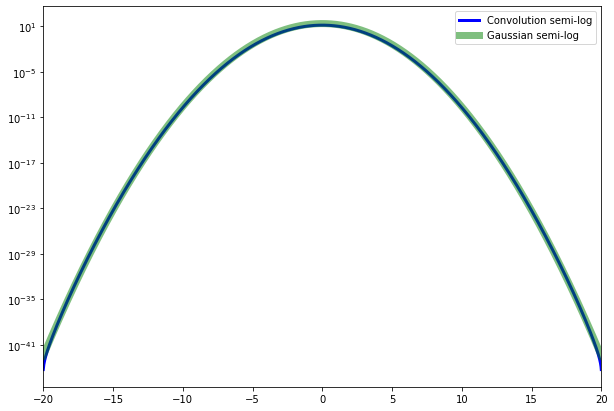

In [191]:
# Creating a new linear space for the convolution distribution, with the same number of values as the convolution result
x_conv = np.linspace(-20, 20, size)

plt.plot(x_conv, conv_gauss, 'b', linewidth = 3, label = 'Convolution semi-log')
plt.xlim(-20,20)

x_gauss = np.linspace(-20,20,1000)
y_gauss = 80*stats.norm.pdf(x_gauss, loc=0, scale = 1/0.71)
plt.plot(x_gauss, y_gauss, 'g', linewidth = 7, alpha = 0.5, label = 'Gaussian semi-log')

plt.legend()
plt.yscale('log')
plt.show()

I tested out different scaling parameters (standard deviation and overall linear scale of pdf) of the Gaussian distribution until I found the parameters that best overlap with the convolution resultant distribution. As you can see, they are very nearly perfectly overlapping, meaning that the convolution of the 2 Gaussians is indeed also a Gaussian.

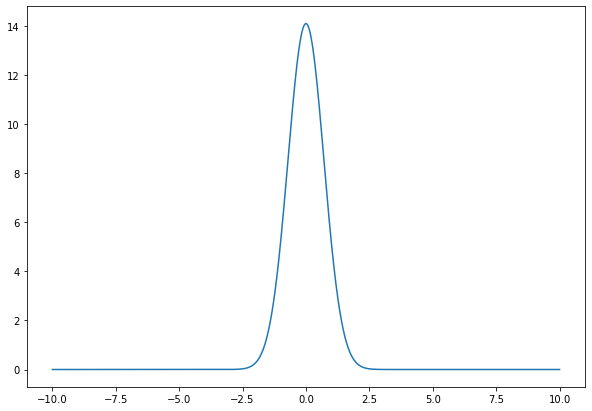

In [200]:
# Average, or expected value
plt.plot(x_conv/2, conv_gauss)
plt.show()

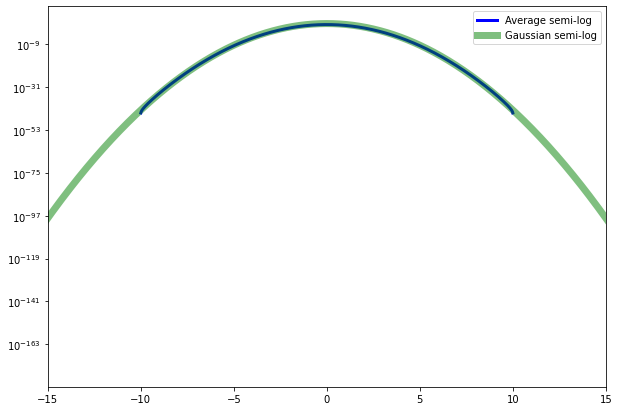

In [201]:
# Creating a new linear space for the convolution distribution, with the same number of values as the convolution result
plt.plot(x_conv/2, conv_gauss, 'b', linewidth = 3, label = 'Average semi-log')

x_gauss = np.linspace(-20,20,1000)
y_gauss = 80*stats.norm.pdf(x_gauss, loc=0, scale = 1/1.43)
plt.plot(x_gauss, y_gauss, 'g', linewidth = 7, alpha = 0.5, label = 'Gaussian semi-log')

plt.legend()
plt.xlim(-15,15)
plt.yscale('log')
plt.show()

As you can see, I also tested out different scaling parameters (standard deviation and overall linear scale of pdf) of the Gaussian distribution until I found the parameters that best overlap with the average distribution. These semi-log plots are also the same shape (upside down parabola) which tells us the average of the 2 Gaussian distributions is indeed also a Gaussian.

In [202]:
# Standard deviation of convolution
# Standard deviation is exp(x^2) - exp(x)^2
def calc_exp_value(x, y, p):
    exp_value = 0
    size = len(x)
    bin_width = (x[size-1]-x[0])/size
    for i in range (0, len(x)):
        exp_value += y[i]*(x[i]*bin_width)**p
    return exp_value

sum_mean = calc_exp_value(x_conv, conv_gauss, 1)
sum_exp_xsq = calc_exp_value(x_conv, conv_gauss, 2)
sum_var = sum_exp_xsq - sum_mean**2
sum_std = sum_var**0.5

# Reporting results and observations
print(f'The standard deviation of the n = 2 convolutions of the Gaussian is {sum_std:.4f}.')

The standard deviation of the n = 2 convolutions of the Gaussian is 1.4135.


The square root of n=2 is also 1.414. So, the convolution of the 2 Gaussians has a standard deviation that has increased by a factor of sqrt(2) = sqrt(N) where N is the number of distributions that were convolved.

In [212]:
# Standard deviation of average of distributions
avg_mean = calc_exp_value(x_conv/2, conv_gauss, 1)
avg_exp_xsq = calc_exp_value(x_conv/2, conv_gauss, 2)
avg_var = avg_exp_xsq - avg_mean**2
avg_std = avg_var**0.5

# Reporting results and observations
print(f'The standard deviation of the average of the Gaussian distributions is {avg_std:.4f}.')
ratio_std = std_gauss/avg_std
print(f'ratio_std = {ratio_std:.4f}')

The standard deviation of the average of the Gaussian distributions is 0.3534.
ratio_std = 2.8298


The standard deviation decreases from an original $\sigma$ = 1 to $\sigma$ = 0.3534, which is approximately equal to $\frac{1}{2\sqrt{2}}$.

This is a decrease by a factor of 2.8299 = 2*sqrt(2). Thus, 